<a href="https://colab.research.google.com/github/FatemehAbediK/signal-processing-EEG/blob/main/eeg_kaggle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/madyanomar/eeg-data-distance-learning-environment

In [1]:
%%capture
!pip install ssqueezepy
"""
convert raw EEG signals into a 2D time-frequency image.
used for wavelet and time-frequency analysis
"""
!pip install timm
"""Once EEG signals are transformed into images (such as scalograms or spectrograms),
 you can use pre-trained image classification models (like ResNet or EfficientNet) from timm to classify those images.
 """
!pip install pytorch-lightning

dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Install Kaggle
!pip install kaggle



In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatemehabedik","key":"6817536e536b38fb1335b3e08111e4b1"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Example: Download a dataset (replace with your dataset)
!kaggle datasets download -d madyanomar/eeg-data-distance-learning-environment


Dataset URL: https://www.kaggle.com/datasets/madyanomar/eeg-data-distance-learning-environment
License(s): CC0-1.0
 96% 21.0M/21.8M [00:02<00:00, 12.6MB/s]
100% 21.8M/21.8M [00:02<00:00, 8.45MB/s]


In [7]:
!unzip  '/content/eeg-data-distance-learning-environment.zip' -d '/content/eeg'

Archive:  /content/eeg-data-distance-learning-environment.zip
  inflating: /content/eeg/EEG_data.csv  
  inflating: /content/eeg/Subject_details.csv  
  inflating: /content/eeg/Video_details.csv  


In [8]:
import pandas as pd
import numpy as np
import os


In [9]:
subject_details=pd.read_csv('/content/eeg/Subject_details.csv')
video_details=pd.read_csv('/content/eeg/Video_details.csv')

In [10]:
subject_details.head()

,Subject_ID,Gender,Age,Education Level,Fields of Interest,Ethnicity
0,0,M,23,University (4th year),Business,Arab
1,1,F,24,High School Graduate,Fashion Design,Arab
2,2,M,14,High School (10th Grade),Sports,Arab
3,3,M,17,High School (12th Grade),Technology,Arab
4,4,M,22,University (4th year),Technology,Arab


In [11]:
video_details.head()

,Video_ID,Title,URL,Instructor
0,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach
1,1,Statistics,https://www.youtube.com/watch?v=h8EYEJ32oQ8&t=...,Sal Khan (Khan Academy)
2,2,String Theory,https://www.youtube.com/watch?v=25haxRuZQUk&li...,Leonard Susskind
3,3,Photosynthesis,https://www.youtube.com/watch?v=g78utcLQrJ4&t=...,Paul Anderson
4,4,Linear Algebra,https://www.youtube.com/watch?v=ZK3O402wf1c&li...,Gilbert Strang


In [12]:
df=pd.read_csv('/content/eeg/EEG_data.csv')

In [13]:
df.head()

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,0
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,0
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,0
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,0
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68831 entries, 0 to 68830
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            68831 non-null  int64  
 1   subject_id          68831 non-null  int64  
 2   EEG.AF3             68831 non-null  float64
 3   EEG.F7              68831 non-null  float64
 4   EEG.F3              68831 non-null  float64
 5   EEG.FC5             68831 non-null  float64
 6   EEG.T7              68831 non-null  float64
 7   EEG.P7              68831 non-null  float64
 8   EEG.O1              68831 non-null  float64
 9   EEG.O2              68831 non-null  float64
 10  EEG.P8              68831 non-null  float64
 11  EEG.T8              68831 non-null  float64
 12  EEG.FC6             68831 non-null  float64
 13  EEG.F4              68831 non-null  float64
 14  EEG.F8              68831 non-null  float64
 15  EEG.AF4             68831 non-null  float64
 16  POW.

In [15]:
cols_remove=df.columns.tolist()[16:-1]
df=df.loc[:, ~df.columns.isin(cols_remove)]
df.columns = df.columns.str.strip('EEG.')                  #based on the names of the channels in this dataset :EEG.AC7 for example !

In [16]:
df.head()

,video_id,subject_id,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,subject_understood
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,4610.384766,4388.846191,4413.461426,4499.743652,0
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,4583.717773,4376.666504,4392.820313,4488.461426,0
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,4574.743652,4377.051270,4390.512695,4483.077148,0
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,4565.512695,4362.436035,4380.897461,4471.025879,0
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,4612.436035,4403.333496,4410.641113,4512.179688,0


In [17]:
#now we need to reshape the data, into subjects,trials,channels,length

groups=df.groupby(['subject_id','video_id'])
grp_keys=list(groups.groups.keys())
print(grp_keys)

[(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (7, 10)]


In [18]:
grpno=grp_keys[0]
grpno

(0, 0)

In [19]:
grp1=groups.get_group(grpno).drop(['subject_id','video_id'],axis=1)
label=grp1['subject_understood']
subject_id=grpno[0]
grp1=grp1.drop('subject_understood',axis=1)
grp1.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,4610.384766,4388.846191,4413.461426,4499.743652
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,4583.717773,4376.666504,4392.820313,4488.461426
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,4574.743652,4377.051270,4390.512695,4483.077148
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,4565.512695,4362.436035,4380.897461,4471.025879
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,4612.436035,4403.333496,4410.641113,4512.179688


MNE

In [20]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 101.9 MB/s eta 0:00:00


In [21]:
import mne

In [22]:
def convertDF2MNE(sub):
    info = mne.create_info(list(sub.columns), ch_types=['eeg'] * len(sub.columns), sfreq=128)
     #especially if we have eeg and emg datad together we can separate like this!

    info.set_montage('standard_1020')
    data=mne.io.RawArray(sub.T, info)

    data.set_eeg_reference()

    data.filter(l_freq= 1 , h_freq= 30)

    epochs=mne.make_fixed_length_epochs(data,duration=3,overlap=2)     #segment the data!!

    return epochs.get_data()

In [23]:
test=convertDF2MNE(grp1)

Creating RawArray with float64 data, n_channels=14, n_times=2402
    Range : 0 ... 2401 =      0.000 ...    18.758 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (3.305 s)

Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 16 events and 384 original time points ...
0 bad epochs droppe

In [24]:
test

array([[[-1.77635684e-14,  8.56556497e-01, -4.28977311e-01, ...,
          4.63213953e+00,  1.79315915e+00, -2.56923018e+00],
        [-1.42108547e-14,  1.35252176e+01,  1.68553491e+01, ...,
          6.85220483e+00,  2.26016506e+00, -2.78757315e+00],
        [ 6.66133815e-15,  2.37444679e+00,  2.61540020e+00, ...,
          6.84800484e+00,  6.40110029e+00,  3.38228648e+00],
        ...,
        [ 2.73114864e-14, -2.30043007e+00, -2.57609827e+00, ...,
          3.99121643e+00,  1.69795107e+00,  5.27298047e+00],
        [ 3.73034936e-14, -9.14361585e+00, -1.08785992e+01, ...,
         -9.17066025e+00, -1.52334659e+00, -1.29097551e+00],
        [ 4.51860771e-14, -1.73622885e+00, -6.60120499e+00, ...,
         -1.53026323e+00, -5.31382302e-01,  2.34899349e-01]],

       [[-6.23219175e+01, -7.19974714e+01, -7.15715428e+01, ...,
         -5.10514967e+00,  3.16364577e+00,  3.66586350e+00],
        [ 2.09158510e+01,  2.04418896e+01,  3.15592172e+01, ...,
          4.23955401e+00,  2.08754851e

In [25]:
test.shape

(16, 14, 384)

## EEG signals to image ##

In [26]:
!mkdir scaleogram

In [27]:
from glob import glob
import scipy.io                  #for .mat(matlab) form of eeg data
import torch.nn as nn
import torch
import numpy as np
from ssqueezepy import cwt       #continuous wavelet transforms (CWT)
from ssqueezepy.visuals import plot   # visualize the time-frequency representations
from ssqueezepy.visuals import imshow
import os
import re
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
test[0][0].shape

(384,)

In [29]:
Wx, scales = cwt(test[0], 'morlet')
print(Wx.shape)
print(scales.shape)

(14, 230, 384)
(230,)


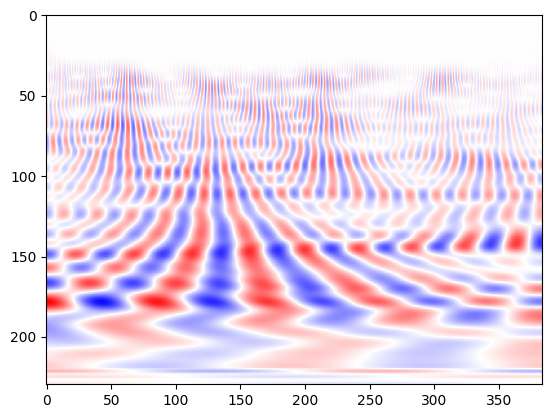

In [30]:
imshow(Wx[0])

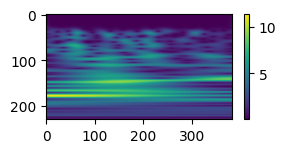

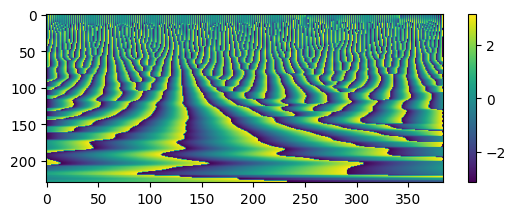

In [31]:
#matplotlib:

plt.figure(figsize=(3,3))

plt.subplot(211)
plt.imshow(np.abs(Wx[0]), aspect='auto')
plt.colorbar()
plt.show();

plt.subplot(212)
plt.imshow(np.angle(Wx[0]), aspect='auto')
plt.colorbar()
plt.show();

perform a Continuous Wavelet Transform (CWT) on each trial of data, and save the resulting scaleogram images as NumPy arrays.

In [32]:
%%capture
grpnos,labels,paths=[],[],[]
for i,grpno in enumerate(grp_keys):
    grp=groups.get_group(grpno).drop(['subject_id','video_id'],axis=1)
    label=int(grp['subject_understood'].unique())
    subject_id=grpno[0]
    grp=grp.drop('subject_understood',axis=1)

    data=convertDF2MNE(grp)#(trials, channels, length)
    for c,x in enumerate(data):
        Wx, scales = cwt(x, 'morlet')
        Wx=np.abs(Wx)
        path=os.path.join('./scaleogram',f'subvideo_{grpno}/',)
        os.makedirs(path,exist_ok=True)
        path=path+f'trial_{c}.npy'
        np.save(path,Wx)

        grpnos.append(i)
        labels.append(label)
        paths.append(path)


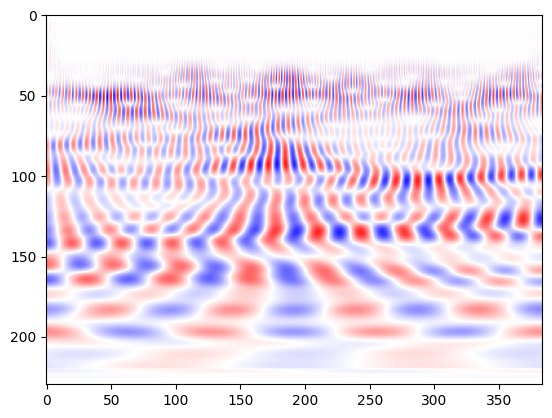

In [33]:
#just to make sure
Wx, scales = cwt(x, 'morlet')
imshow(Wx[0])


In [34]:
df_scale=pd.DataFrame(zip(paths,labels,grpnos),columns=['path','label','group'])
df_scale.head()

,path,label,group
0,"./scaleogram/subvideo_(0, 0)/trial_0.npy",0,0
1,"./scaleogram/subvideo_(0, 0)/trial_1.npy",0,0
2,"./scaleogram/subvideo_(0, 0)/trial_2.npy",0,0
3,"./scaleogram/subvideo_(0, 0)/trial_3.npy",0,0
4,"./scaleogram/subvideo_(0, 0)/trial_4.npy",0,0


In [35]:
import numpy as np
from pytorch_lightning import seed_everything, LightningModule, Trainer
from sklearn.utils import class_weight
import torch.nn as nn
import torch
from torch.utils.data.dataloader import DataLoader
from pytorch_lightning.callbacks import EarlyStopping,ModelCheckpoint,LearningRateMonitor
from torch.optim.lr_scheduler import CyclicLR, ReduceLROnPlateau,CosineAnnealingWarmRestarts,OneCycleLR,CosineAnnealingLR
import torchvision
from sklearn.metrics import classification_report,f1_score,accuracy_score,roc_curve,auc,roc_auc_score
from PIL import Image
import cv2
from torch.utils.data import DataLoader, Dataset,ConcatDataset
import torchmetrics
import timm
import random

In [36]:
#read data from folders
class DataReader(Dataset):
    def __init__(self, dataset,aug=None):
        self.dataset = dataset
        self.aug=aug

    def __getitem__(self, index):
        x=self.dataset.path[index]
        y=self.dataset.label[index]
        x=np.load(x)
        if self.aug:
          if random.uniform(0, 1)>0.5:
            x=np.flip(x,-1)
          if random.uniform(0, 1)>0.5:
            x=np.flip(x,-2)

        x=(x - np.min(x)) / (np.max(x) - np.min(x))

        return x, y

    def __len__(self):
        return len(self.dataset)

In [37]:
test_loader=DataLoader(DataReader(df_scale,True), batch_size =8)
test_batch=next(iter(test_loader))
test_batch[0].shape ,test_batch[1].shape

(torch.Size([8, 14, 230, 384]), torch.Size([8]))

In [38]:
#for a chack of REsNet
model=timm.create_model('resnest26d',pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/68.4M [00:00<?, ?B/s]

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNestBottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (con

In [55]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from pytorch_lightning import LightningModule, Trainer
import torchmetrics
from sklearn.model_selection import StratifiedGroupKFold

class OurModel(LightningModule):
    def __init__(self, train_split, val_split):
        super().__init__()
        # Initialize metrics
        self.metrics = torchmetrics.Accuracy(num_classes=1, task='binary')

        # Architecture
        self.train_split = train_split
        self.val_split = val_split

        model_name = 'resnest26d'
        self.model = timm.create_model(model_name, pretrained=True)
        self.model.conv1[0] = nn.Conv2d(14, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

        # Fully connected layers
        self.fc1 = nn.Linear(1000, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 1)
        self.drp = nn.Dropout(0.25)

        # Parameters
        self.lr = 1e-3
        self.batch_size = 16
        self.numworker = 2
        self.criterion = nn.BCEWithLogitsLoss()

        # Store losses and accuracies
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []

    def forward(self, x):
        x = self.model(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.drp(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.drp(x)
        x = self.fc3(x)
        return x

    def configure_optimizers(self):
        return torch.optim.AdamW(params=self.parameters(), lr=self.lr)

    def train_dataloader(self):
        return DataLoader(DataReader(self.train_split, False), batch_size=self.batch_size,
                          num_workers=self.numworker, pin_memory=True, shuffle=True)

    def training_step(self, batch, batch_idx):
        image, label = batch
        pred = self(image)
        loss = self.criterion(pred.flatten(), label.float())  # Calculate loss
        acc = self.metrics(pred.flatten(), label)  # Calculate accuracy
        self.log('train_loss', loss)  # Log the loss
        self.log('train_acc', acc)     # Log the accuracy
        return loss

    def val_dataloader(self):
        return DataLoader(DataReader(self.val_split), batch_size=self.batch_size,
                          num_workers=self.numworker, pin_memory=True, shuffle=False)

    def validation_step(self, batch, batch_idx):
        image, label = batch
        pred = self(image)
        loss = self.criterion(pred.flatten(), label.float())  # Calculate loss
        acc = self.metrics(pred.flatten(), label)  # Calculate accuracy
        self.log('val_loss', loss)  # Log the loss
        self.log('val_acc', acc)     # Log the accuracy
        return loss

    def test_dataloader(self):
        return DataLoader(DataReader(self.val_split), batch_size=self.batch_size,
                          num_workers=self.numworker, pin_memory=True, shuffle=False)

    def test_step(self, batch, batch_idx):
        image, label = batch
        pred = self(image)
        loss = self.criterion(pred.flatten(), label.float())  # Calculate loss
        acc = self.metrics(pred.flatten(), label)  # Calculate accuracy
        loss=self.log('test_loss', loss)
        acc= self.log('test_acc', acc)
        return {'label': label, 'pred': pred , 'test_loss' : loss , 'test_acc' : acc}


    def on_test_epoch_end(self, outputs):

        print("Test epoch ended with outputs:", outputs)

        if outputs:
            print(f"Test outputs: {outputs}")
        else:
            print("No outputs found at test epoch end.")
        # Concatenate the outputs from all test steps
        label = torch.cat([x["label"] for x in outputs])
        pred = torch.cat([x["pred"] for x in outputs])

        acc = self.metrics(pred.flatten(), label)
        print('Accuracy:', acc)

        # Additional evaluation metrics
        pred = pred.detach().cpu().numpy().ravel()
        label = label.detach().cpu().numpy().ravel()
        print('sklearn auc', roc_auc_score(label, pred))
        pred = np.where(pred > 0.5, 1, 0).astype(int)
        print('torch acc', acc)
        print(classification_report(label, pred))
        print('sklearn', accuracy_score(label, pred))


Loss Function and Metrics:  nn.BCEWithLogitsLoss() is for (binary classification). If you have more than two classes, use
 nn.CrossEntropyLoss().

In [42]:
gkf = StratifiedGroupKFold(n_splits=5)
result = []
valacc = []

# Loop through each train/validation split
for train_index, val_index in gkf.split(df_scale.path, df_scale.label, groups=df_scale.group):
    train_df = df_scale.iloc[train_index].reset_index(drop=True)
    val_df = df_scale.iloc[val_index].reset_index(drop=True)

    model = OurModel(train_df, val_df)

    trainer = Trainer(max_epochs=5,
                  precision=16,   #16 for GPU and 32 for CPU
                  enable_progress_bar=True,
                  num_sanity_val_steps=0)

    trainer.fit(model)
    res = trainer.validate(model)
    result.append(res)
    valacc.append(model.val_acc)

/usr/local/lib/python3.10/dist-packages/lightning_fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | metrics   | BinaryAccuracy    | 0      | train
1 | model     | ResNet            | 17.1 M | train
2 | fc1       | Linear            | 500 K  | train
3 | relu      | ReLU              | 0      | train
4 | fc2       | Linear

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.6315789222717285     │
│         val_loss          │    1.7045177221298218     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | metrics   | BinaryAccuracy    | 0      | train
1 | model     | ResNet            | 17.1 M | train
2 | fc1       | Linear            | 500 K  | train
3 | relu      | ReLU              | 0      | train
4 | fc2       | Linear            | 125 K  | train
5 | fc3       | Linear            | 251    | train
6 | drp       | Dropout           | 0      | train
7 | criterion | BCEWithLogitsLoss | 0      | train
---------------------

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.2857142984867096     │
│         val_loss          │     1.392917275428772     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | metrics   | BinaryAccuracy    | 0      | train
1 | model     | ResNet            | 17.1 M | train
2 | fc1       | Linear            | 500 K  | train
3 | relu      | ReLU              | 0      | train
4 | fc2       | Linear            | 125 K  | train
5 | fc3       | Linear            | 251    | train
6 | drp       | Dropout           | 0      | train
7 | criterion | BCEWithLogitsLoss | 0      | train
---------------------

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.5666666626930237     │
│         val_loss          │    2.2446465492248535     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | metrics   | BinaryAccuracy    | 0      | train
1 | model     | ResNet            | 17.1 M | train
2 | fc1       | Linear            | 500 K  | train
3 | relu      | ReLU              | 0      | train
4 | fc2       | Linear            | 125 K  | train
5 | fc3       | Linear            | 251    | train
6 | drp       | Dropout           | 0      | train
7 | criterion | BCEWithLogitsLoss | 0      | train
---------------------

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.7668161392211914     │
│         val_loss          │    0.6296350955963135     │
└───────────────────────────┴───────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | metrics   | BinaryAccuracy    | 0      | train
1 | model     | ResNet            | 17.1 M | train
2 | fc1       | Linear            | 500 K  | train
3 | relu      | ReLU              | 0      | train
4 | fc2       | Linear            | 125 K  | train
5 | fc3       | Linear            | 251    | train
6 | drp       | Dropout           | 0      | train
7 | criterion | BCEWithLogitsLoss | 0      | train
---------------------

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │     0.739130437374115     │
│         val_loss          │     3.932157278060913     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

test

In [ ]:
# Test results
test_results = trainer.test(model)

for result in test_results:
    print(result)

In [ ]:
all_labels = []
all_predictions = []

for batch in test_results:
    labels = batch['label']
    preds = batch['pred']
    all_labels.append(labels)
    all_predictions.append(preds)

all_labels = torch.cat(all_labels).detach().cpu().numpy()
all_predictions = torch.cat(all_predictions).detach().cpu().numpy()

accuracy = (all_predictions.round() == all_labels).mean()
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report
preds_binary = (all_predictions > 0.5).astype(int)
print(classification_report(all_labels, preds_binary))

In [ ]:
# Assuming model stores losses and accuracies
epochs = range(1, len(model.train_loss) + 1)

plt.figure(figsize=(12, 6))

# Plotting Losses
plt.subplot(1, 2, 1)
plt.plot(epochs, model.train_loss, label='Train Loss')
plt.plot(epochs, model.val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, model.train_acc, label='Train Accuracy')
plt.plot(epochs, model.val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()